In [48]:
import sklearn.datasets as skd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from parameter import Parameters
from functions import sigmoid, sigmoid_derivative, BCE_to_sigmoid_derivative, softmax, softmax_derivative, MCE_to_softmax_derivative, ReLU, ReLU_derivative
from recursive_mlp import MLP

In [50]:
def plot_decision_regions(X, t, clf=[], size=(8,6)):
    """Plot the data set (X,t) together with the decision boundary of the classifier clf"""
    # The region of the plane to consider determined by X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Make a make of the whole region
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # have to transpose because the whole algorithm is working transposed
    Z = clf.predict((np.c_[xx.ravel(), yy.ravel()]).T).T
    
    # Classify each meshpoint.
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=size) # You may adjust this

    # Put the result into a color plot
    plt.contourf(xx, yy, Z, alpha=0.2, cmap = 'Paired')

    plt.scatter(X[:,0], X[:,1], c=t, s=10.0, cmap='Paired')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision regions")
    plt.xlabel("x0")
    plt.ylabel("x1")

In [51]:
X, t_multi = skd.make_blobs(n_samples=[400,400,400, 400], 
                        centers=[[0,1],[4,2],[8,1], [2,5]], 
                        cluster_std=[1.0, 0.3, 0.5, 1.0],
                        n_features=2, random_state=2022)

indices = np.arange(X.shape[0])
rng = np.random.RandomState(2022)
rng.shuffle(indices)
indices[:10]

X_train = X[indices[:1000],:]
X_val = X[indices[1000:1500],:]
X_test = X[indices[1500:],:]
t_multi_train = t_multi[indices[:1000]]
t_multi_val = t_multi[indices[1000:1500]]
t_multi_test = t_multi[indices[1500:]]

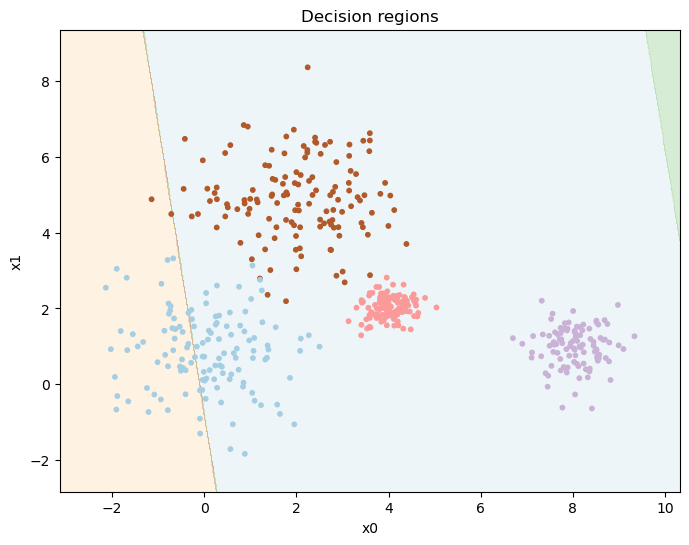

In [86]:
p1 = Parameters(ReLU, ReLU_derivative, BCE_to_sigmoid_derivative)
p2 = Parameters(softmax, softmax_derivative, MCE_to_softmax_derivative)
m = MLP(multi=True)

m.add((2,7), p1)
m.add((7,5), p1)
m.add((5,4), p2)

#one hot encoding
one_hot_encoded = np.eye(4)[t_multi_train]


# have to transpose because the whole algorithm is working transposed
m.fit(X_train.T, one_hot_encoded.T)

plot_decision_regions(X_val, t_multi_val, clf=m) #not great precision/accuracy
